In [1]:
# download the image
!wget https://s3-us-west-1.amazonaws.com/cogniac-public-data/PythonBackendInterviewExerciseImages.zip

#unzip file
!unzip PythonBackendInterviewExerciseImages.zip

#remove macosx extra files
!rm -rf images/flowers/.DS_Store
!rm -rf images/.DS_Store 
!rm -rf __MACOSX/

--2021-11-18 22:23:59--  https://s3-us-west-1.amazonaws.com/cogniac-public-data/PythonBackendInterviewExerciseImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.128
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276496583 (264M) [application/zip]
Saving to: ‘PythonBackendInterviewExerciseImages.zip’

PythonBackendInterv 100%[===================>] 263.69M  56.1MB/s    in 5.1s    

2021-11-18 22:24:04 (51.7 MB/s) - ‘PythonBackendInterviewExerciseImages.zip’ saved [276496583/276496583]

Archive:  PythonBackendInterviewExerciseImages.zip
   creating: images/
  inflating: images/.DS_Store        
  inflating: __MACOSX/images/._.DS_Store  
   creating: images/satelliite/
   creating: images/flowers/
  inflating: images/satelliite/847.png  
  inflating: images/satelliite/1445.png  
  inflating: images/satelliite/1451.png  
  inflating: images/

In [7]:
import numpy as np
import json
import tensorflow as tf
import os
import requests
import matplotlib.pyplot as plt

Original image randomly choosen from flowers folder:


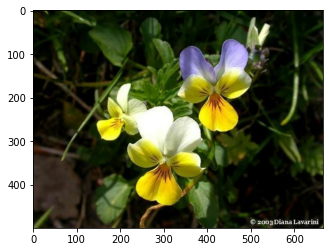

In [13]:
def display_image(image : tf.Tensor) -> None:
    image = tf.io.decode_image(image)
    image = tf.cast(image, tf.uint8)
    image = image.numpy()
    plt.imshow(image)
    plt.show()

folder="/content/images/flowers/"
#load random image from folder
filename=np.random.choice(np.array(os.listdir(folder)))
#load image
im=tf.io.read_file(folder+filename)
print("Original image randomly choosen from flowers folder:")
display_image(im)

Augumented image:


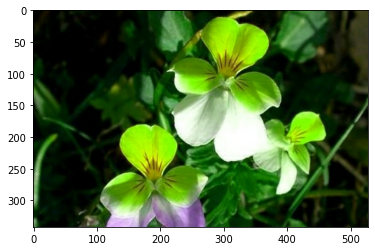

In [14]:

img = tf.io.decode_image(im)
img=img.numpy()
data = json.dumps({"signature_name": "serving_default", "instances": img.tolist()})

headers = {"content-type": "application/json"}

json_response = requests.post('http://35.223.109.70:8501/v1/models/augment_num:predict', data=data, headers=headers)
# let's make sure we didn't get an error
if json_response.status_code != 200:
    print(json_response.text)
    raise RuntimeError("Error while calling TensorFlow Serving model")

img = np.array(json.loads(json_response.text)['predictions'])
image = tf.io.encode_jpeg(img)
print("Augumented image:")
display_image(image)